<a href="https://colab.research.google.com/github/Pratheek-05/ShadowFox-internship/blob/main/Intermediate_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Sample - Superstore.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('Sample - Superstore.csv', encoding='cp1252')
        except Exception as e:
            print(f"Could not decode the file with common encodings: {e}")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64

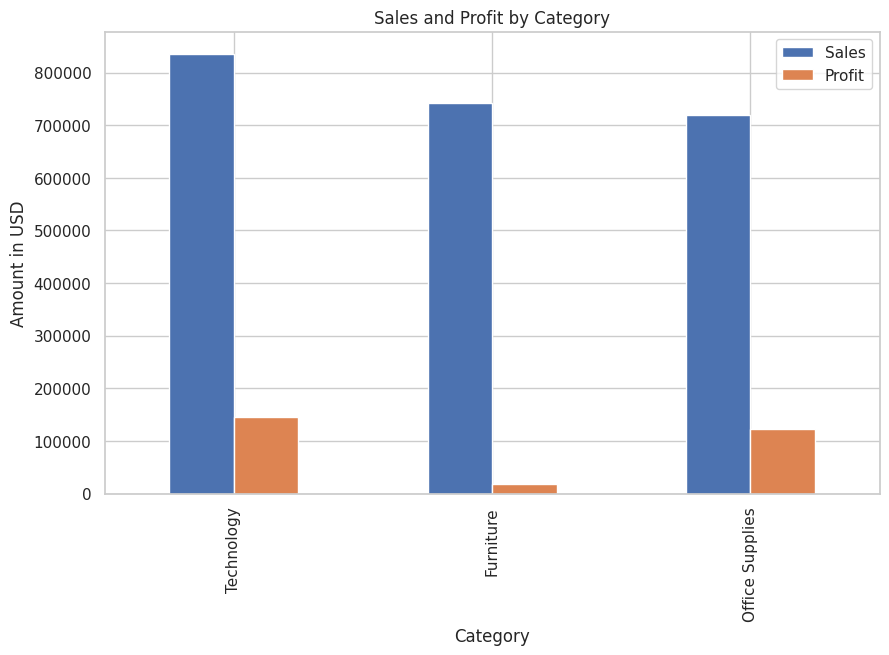

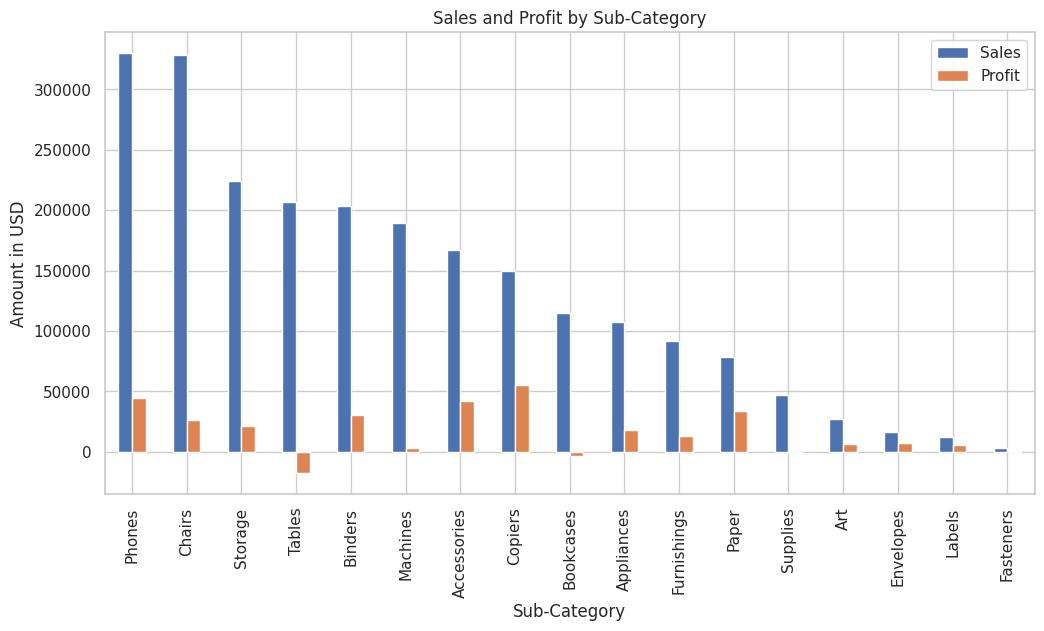

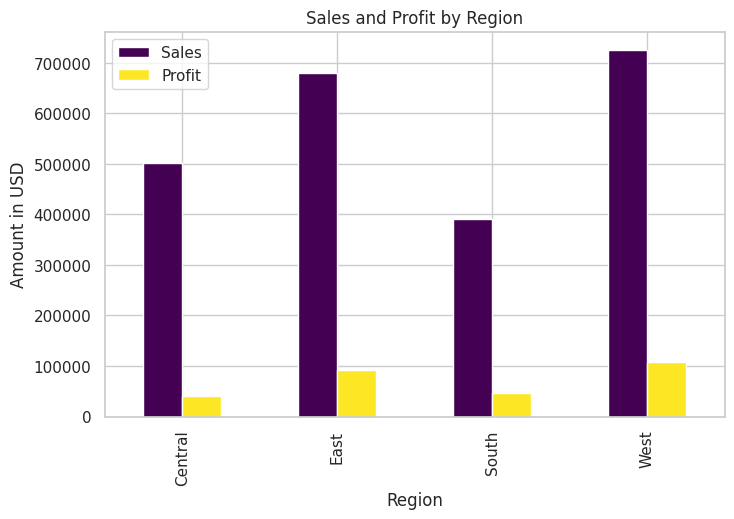

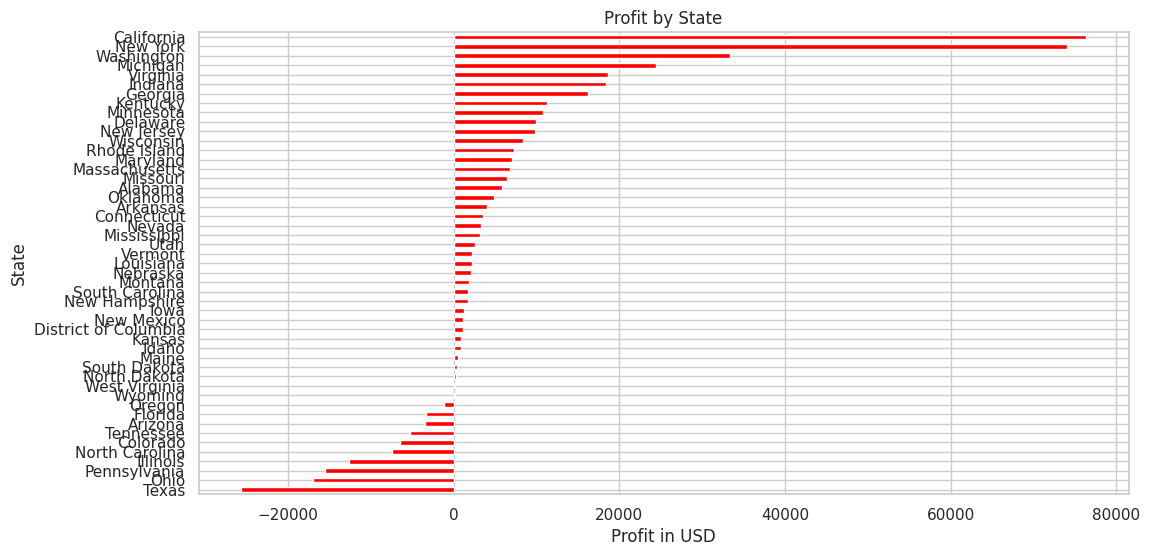

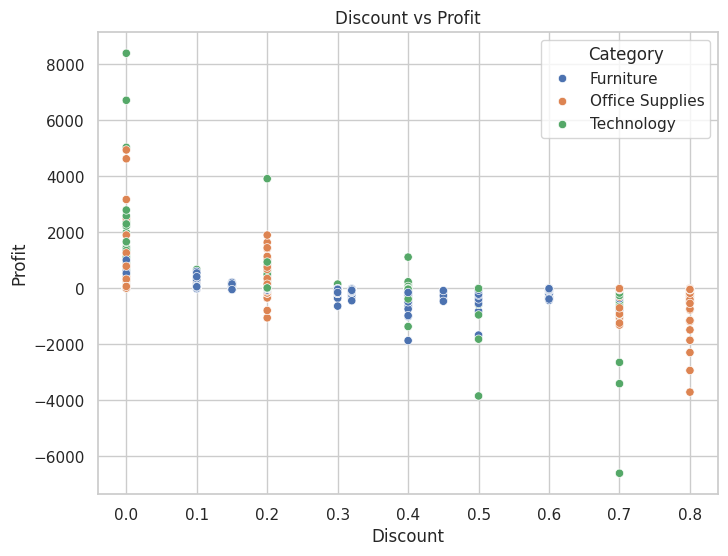

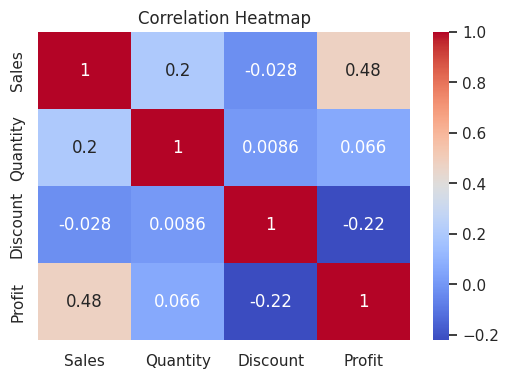

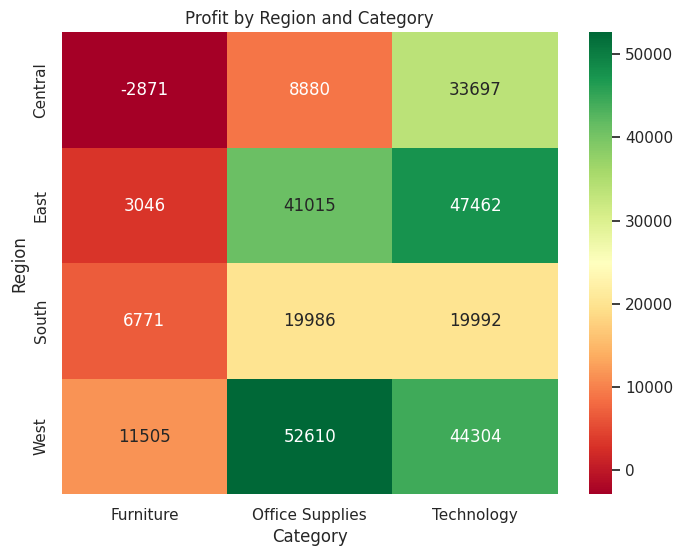


--- Key Insights ---

Top 5 Loss-Making States:
State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Name: Profit, dtype: float64

Top 5 Profitable States:
State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

Average Profit Margin across dataset: 12.03%

Orders with High Discount (>40%):
           Category Sub-Category      Sales     Profit  Discount
3         Furniture       Tables   957.5775  -383.0310      0.45
14  Office Supplies   Appliances    68.8100  -123.8580      0.80
15  Office Supplies      Binders     2.5440    -3.8160      0.80
27        Furniture    Bookcases  3083.4300 -1665.0522      0.50
28  Office Supplies      Binders     9.6180    -7.0532      0.70


In [ ]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable inline plotting
%matplotlib inline
sns.set(style='whitegrid')

# STEP 2: Load the dataset
# Make sure the file name matches your uploaded CSV
# Try different encodings if utf-8 is not the correct one
try:
    df = pd.read_csv('Sample - Superstore.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('Sample - Superstore.csv', encoding='cp1252')
        except Exception as e:
            print(f"Could not decode the file with common encodings: {e}")
            # You might need to try other encodings or inspect the file
            # with a text editor that can detect encoding.

# Check if df was loaded successfully
if 'df' in locals():
    # STEP 3: Basic Exploration
    print("Dataset Info:")
    df.info()

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Drop duplicates if present
    df.drop_duplicates(inplace=True)

    # STEP 4: Feature Engineering
    # Ensure columns exist before calculating profit margin
    if 'Profit' in df.columns and 'Sales' in df.columns:
        df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100
    else:
        print("Warning: 'Profit' or 'Sales' column not found. Skipping Profit Margin calculation.")


    # STEP 5: Descriptive Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # STEP 6: Sales and Profit by Category
    # Ensure necessary columns exist before plotting
    if 'Category' in df.columns and 'Sales' in df.columns and 'Profit' in df.columns:
        cat = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
        cat.plot(kind='bar', figsize=(10,6), title='Sales and Profit by Category')
        plt.ylabel('Amount in USD')
        plt.show()
    else:
        print("Warning: 'Category', 'Sales', or 'Profit' column not found. Skipping Category analysis.")


    # STEP 7: Sub-Category Analysis
    # Ensure necessary columns exist before plotting
    if 'Sub-Category' in df.columns and 'Sales' in df.columns and 'Profit' in df.columns:
        subcat = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
        subcat.plot(kind='bar', figsize=(12,6), title='Sales and Profit by Sub-Category')
        plt.ylabel('Amount in USD')
        plt.show()
    else:
         print("Warning: 'Sub-Category', 'Sales', or 'Profit' column not found. Skipping Sub-Category analysis.")


    # STEP 8: Region-wise Sales and Profit
    # Ensure necessary columns exist before plotting
    if 'Region' in df.columns and 'Sales' in df.columns and 'Profit' in df.columns:
        region = df.groupby('Region')[['Sales', 'Profit']].sum()
        region.plot(kind='bar', figsize=(8,5), title='Sales and Profit by Region', colormap='viridis')
        plt.ylabel('Amount in USD')
        plt.show()
    else:
         print("Warning: 'Region', 'Sales', or 'Profit' column not found. Skipping Region analysis.")


    # STEP 9: State-wise Profit
    # Ensure necessary columns exist before plotting
    if 'State' in df.columns and 'Profit' in df.columns:
        state_profit = df.groupby('State')['Profit'].sum().sort_values()
        plt.figure(figsize=(12,6))
        state_profit.plot(kind='barh', color='red')
        plt.title('Profit by State')
        plt.xlabel('Profit in USD')
        plt.show()
    else:
        print("Warning: 'State' or 'Profit' column not found. Skipping State analysis.")


    # STEP 10: Discount vs Profit Scatter Plot
    # Ensure necessary columns exist before plotting
    if 'Discount' in df.columns and 'Profit' in df.columns and 'Category' in df.columns:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
        plt.title('Discount vs Profit')
        plt.show()
    else:
        print("Warning: 'Discount', 'Profit', or 'Category' column not found. Skipping Discount vs Profit scatter plot.")


    # STEP 11: Correlation Heatmap
    # Ensure necessary columns exist before plotting
    if all(col in df.columns for col in ['Sales', 'Quantity', 'Discount', 'Profit']):
        plt.figure(figsize=(6,4))
        sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print("Warning: Required columns for Correlation Heatmap ('Sales', 'Quantity', 'Discount', 'Profit') not found. Skipping heatmap.")


    # STEP 12: Plotly Interactive – Sales by Sub-Category
    # Ensure necessary columns exist before plotting
    if 'Sub-Category' in df.columns and 'Sales' in df.columns:
         fig = px.bar(df.groupby('Sub-Category')['Sales'].sum().reset_index(),
                     x='Sub-Category', y='Sales', color='Sales',
                     title='Sales by Sub-Category (Interactive)',
                     color_continuous_scale='Blues')
         fig.show()
    else:
        print("Warning: 'Sub-Category' or 'Sales' column not found. Skipping Plotly Interactive plot.")


    # STEP 13: Profit Heatmap by Region & Category
    # Ensure necessary columns exist before plotting
    if all(col in df.columns for col in ['Region', 'Category', 'Profit']):
        pivot = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')
        plt.figure(figsize=(8,6))
        sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn')
        plt.title("Profit by Region and Category")
        plt.show()
    else:
        print("Warning: Required columns for Profit Heatmap ('Region', 'Category', 'Profit') not found. Skipping heatmap.")

    # STEP 14: Key Insights
    print("\n--- Key Insights ---")
    # Add checks before accessing columns
    if 'State' in df.columns and 'Profit' in df.columns:
        print("\nTop 5 Loss-Making States:")
        print(df.groupby('State')['Profit'].sum().sort_values().head(5))

        print("\nTop 5 Profitable States:")
        print(df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5))
    else:
        print("Warning: 'State' or 'Profit' column not found. Skipping state insights.")


    if 'Profit Margin (%)' in df.columns:
        print("\nAverage Profit Margin across dataset: {:.2f}%".format(df['Profit Margin (%)'].mean()))
    else:
        print("Warning: 'Profit Margin (%)' column not found. Skipping average profit margin.")


    if all(col in df.columns for col in ['Discount', 'Category', 'Sub-Category', 'Sales', 'Profit']):
        print("\nOrders with High Discount (>40%):")
        high_discount = df[df['Discount'] > 0.4]
        print(high_discount[['Category', 'Sub-Category', 'Sales', 'Profit', 'Discount']].head())
    else:
        print("Warning: Required columns for High Discount analysis ('Discount', 'Category', 'Sub-Category', 'Sales', 'Profit') not found. Skipping analysis.")
else:
    print("DataFrame was not loaded successfully due to encoding issues.")